# Homework 2: **Bayesian** *regression* and *classification*, ***Gaussian Processes*** (part 1)

Probabilistic Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/emaballarin/probml-units/blob/main/homework-2023/02_bayesian_reg_class_gps_HW.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### Exercise 1 (theory: *Bayesian conjugate modelling*)

Consider the Gamma distribution $\text{Gamma}(\alpha, \beta)$ with p.d.f. $\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}$, and the Poisson distribution $\text{Poisson}(\lambda)$ with p.m.f. $\frac{\lambda^k e^{-\lambda}}{k!}.$

Given the model
$$
    \begin{align*}
    \lambda &\sim \text{Gamma}(\alpha, \beta)\\
    x &\sim \text{Poisson}(\lambda)
    \end{align*}
$$
prove that the Gamma distribution is a conjugate prior for the Poisson likelihood (for the given model).

#### Solution

The likelihood function for the Poisson distribution is equivalent to

\begin{equation*}

\Pr (X \mid \lambda) = \prod_{i=1}^{n} \frac{\lambda^{X_i} e^{-\lambda}}{X_i!}

\end{equation*}

Now, we chose a Gamma distribution for the $\lambda$ parameter

\begin{equation*}

\Pr (\lambda \mid \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}

\end{equation*}

From the Bayesan theroem we know that the posterior distribution of $\lambda$ is proportional to the product of the prior distribution and the likelihood function.

\begin{equation*}

\Pr (\lambda \mid X,\alpha,\beta) \propto \Pr (X \mid \lambda) \Pr ( \lambda \mid \alpha, \beta)

\end{equation*}

Substituting the expressions for the likelihood and prior distributions, we get:

\begin{align*}
\Pr(\lambda \mid X,\alpha,\beta) &\propto \prod_{i=1}^n \frac{\lambda^{X_i} e^{-\lambda}}{X_i!} \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda} \
&\propto \lambda^{\sum_{i=1}^n X_i + \alpha - 1} e^{-(n+\beta)\lambda}
\end{align*}

and so $\Pr(\lambda \mid X,\alpha,\beta)$ is the Gamma distribution $\text{Gamma}(\sum_{i=1}^n X_i + \alpha, n+\beta)$.

### Exercise 2 (practicum: *`sklearn`, Naive Bayes*)

The *Wine* dataset is a classic *toy dataset* for classification tasks. It contains 178 samples of 3 different types of wine (encoded with a sequantial integer), with 13 continuous numeric features each. The goal is to (learn to) predict the type of an unknown wine (of any of those 3 types), given its specific features.

It can be easily imported from `sklearn` as:

```python
from sklearn.datasets import load_wine
... = load_wine()
```

Trying to use the `sklearn` interface as much as possible (no not *re-invent the wheel*!):

1. Split the dataset into a training and a test set (*hint:* use the `train_test_split` function), with the test split approximately $1/3^\text{rd}$ of the available data. Ensure that both sets are adequately representative of the problem at hand!

2. Fit a `LogisticRegression` model on the *training* split, and try to predict the labels from (just) the numeric features of the *test* split (*note:* we are not dealing with a *Bayesian* classifier yet; that will require - apart from theoretical knowledge, which you should already have! - sufficient experience with a Bayesian statistical modelling library, *e.g.* [Pyro](https://pyro.ai/), which will be introduced to you soon!)

3. Evaluate the performance of the model on the *test* split.

4. Fit a `GaussianNB` (*Naive Bayes classifier*) model on the *training* split, and try to predict the labels from (just) the numeric features of the *test* split. Evaluate the performance of the model on the *test* split.

5. Compare the performance of the two models according to a suitable metric and briefly comment.

#### Solution

1. First of all, we load the `wine` dataset and split it into `X_train`, `X_test`, `y_train`, `y_test` dataframes.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()

# Split the dataset into trainig and test set
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=1/3, random_state=0)

Next, we assure the data is equally distributed over response classes in both train and test sets.

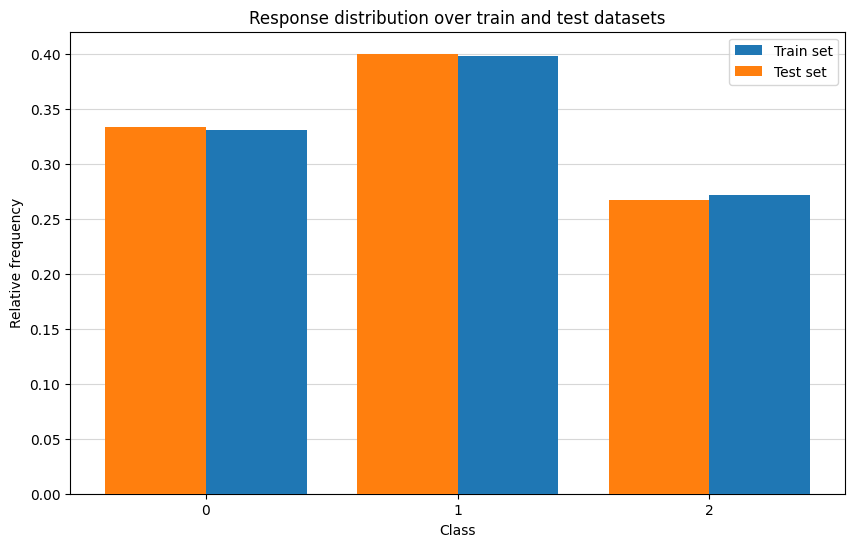

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))

plt.bar([0.2,1.2,2.2], np.unique(y_train, return_counts=True)[1]/len(y_train), width=.4, label="Train set", zorder=3)
plt.bar([-.2,.8,1.8], np.unique(y_test, return_counts=True)[1]/len(y_test), width=.4, label="Test set", zorder=3)

plt.title("Response distribution over train and test datasets")

plt.xticks([0,1,2])

plt.xlabel("Class")
plt.ylabel("Relative frequency")

plt.legend()

plt.grid(axis='y', alpha=.5, zorder=0)

plt.show()

2. Next we fit a `LogisticRegression`,
3. and then we evaluate the performances of the `LogisticRegression` on the test set.

In [3]:
from sklearn.linear_model import LogisticRegression

# Fit the LogisticRegression model on the training data
lr_model = LogisticRegression(solver='lbfgs', max_iter=5_000, random_state=0).fit(X_train, y_train)

# Predict labels from the test split
lr_model.predict(X_test)

# Compute the mean accuracy on the test data
lr_model.score(X_test, y_test)

0.9833333333333333

4. As a next step, we try to fit a `GaussianNB` (*Naive Bayes*) classifier.

In [4]:
from sklearn.naive_bayes import GaussianNB

# Fit the GaussianNB model on the training data
gnb_model = GaussianNB().fit(X_train, y_train)

# Predict labels from the test split
gnb_model.predict(X_test)

# Compute the mean accuracy on the test data
gnb_model.score(X_test, y_test)

0.95

5. The two models have very similar performances (the mean accuracy for the `LogisticRegression` is 0.983, while for the `GaussianNB` is 0.950). Having a larger starting dataset, we could certainly better appreciate the difference between the two models.

### Exercise 3 (practicum: *`sklearn`, Gaussian Process regression fitting*)

🔗 Reference: [https://scikit-learn.org](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html)

The *Mauna Loa Carbon Dioxide* dataset is another *toy* dataset, this time for **regression tasks** (specifically *time series* regression and prediction). It contains the raw recordings of atmospheric CO$_2$ concentration (in parts per million) at the Mauna Loa Observatory in Hawaii, in some days between 1958 and 2001. The goal is to (learn to) predict the CO$_2$ concentration at a given time, given the previous measurements.

By using some clever `sklearn` utilities, it can be easily imported as:

```python
from sklearn.datasets import fetch_openml
... = fetch_openml(data_id=41187, as_frame=True, parser="pandas")
```

On the resulting dataset, perform the following preprocessing steps (in `pandas`):

1. Drop from the dataset all the columns with data other than time information (if you want to convert time information to proper dates, you can use the `pandas.to_datetime` function; but that's up to you!) and the actual carbon dioxide concentration (`co2`).

2. Compute monthly averages of the `co2` column and remove from the dataframe all resulting rows (*i.e.* months with no measurements al all).

In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the Mauna Loa Carbon Dioxide dataset as Pandas DataFrame
mauna_co2 = fetch_openml(data_id=41187, as_frame=True, parser="pandas").frame

# Coombine `year` and `month` columns into `month` column
mauna_co2['month'] = pd.to_datetime([f'{y}-{m}' for y, m in zip(mauna_co2.year, mauna_co2.month)])

# Keep only date-related and CO_2 columns from the dataset
mauna_co2 = mauna_co2[['month', 'day', 'co2']]

# Compute the monthly average of CO2
mauna_co2 = mauna_co2.groupby('month').mean().reset_index().round(2)[['month', 'co2']]

Exploiting the contents of `sklearn.gaussian_process.kernels`, design an adequate kernel for the (predictive) regression task at hand, and fit a `GaussianProcessRegressor` model on a *training* split (which you need to define from original data, approximately 0.85 of the whole dataset), and try to predict the labels from (just) the numeric features of the *test* split. Evaluate the performance of the model on the remaining *test* split.

Notice that the task has been already solved (many!) times before (and such solutions may be available online!). The point of the exercise is to gain some experience with the `sklearn` interface for Gaussian Processes regression, and to get a feel for the kind of effects modelled by different choices of kernel (not to get perfect results!).

If you want to try (and show!) different possible solutions, feel free to do it. You may discover some potentially interesting phenomena!

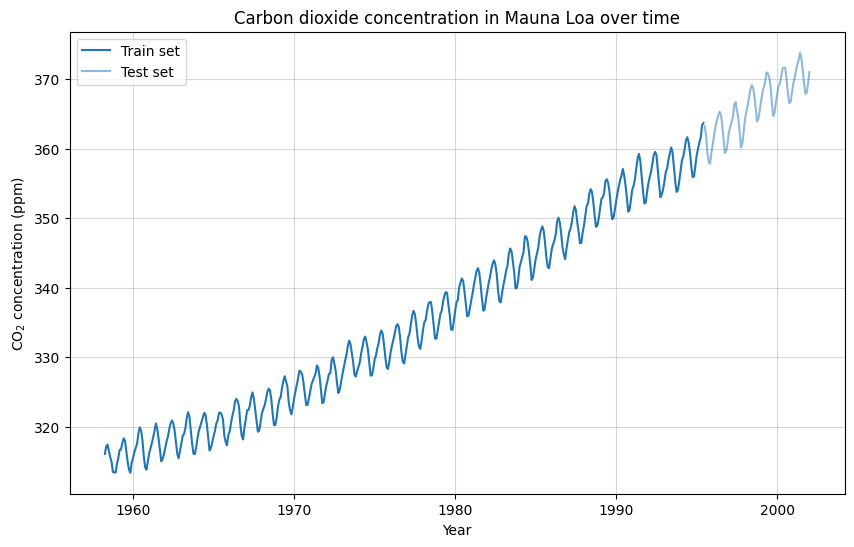

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    mauna_co2.month, mauna_co2.co2, train_size=.85, shuffle=False)

X_train = (X_train.dt.year + X_train.dt.month / 12).to_numpy().reshape(-1, 1)
X_test = (X_test.dt.year + X_test.dt.month / 12).to_numpy().reshape(-1, 1)

plt.figure(figsize=(10, 6))

plt.title("Carbon dioxide concentration in Mauna Loa over time")

plt.plot(X_train, y_train, label='Train set')
plt.plot(X_test, y_test, label='Test set', color='tab:blue', alpha=.5)

plt.legend()

plt.xlabel("Year")
plt.ylabel("CO$_2$ concentration (ppm)")

plt.grid(alpha=.5)

plt.show()

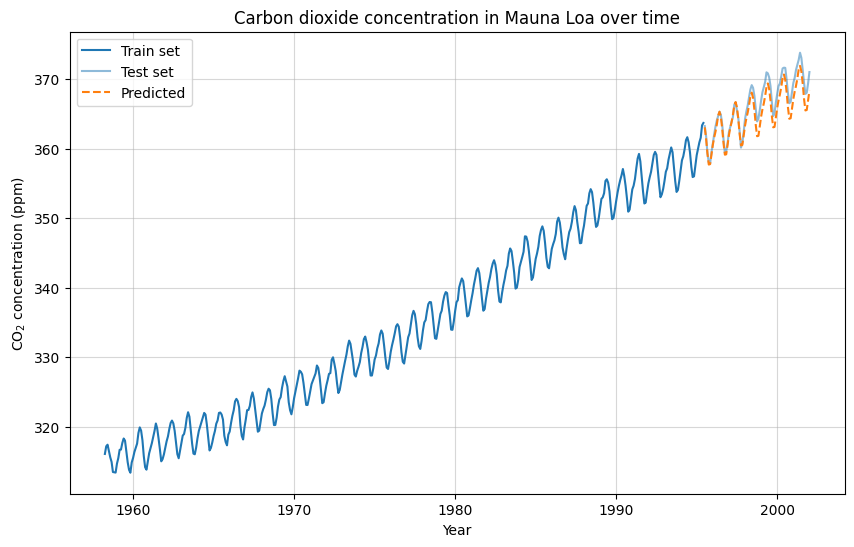

0.8403317267247765

In [7]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel, RationalQuadratic

# We design the final kernel as sum of single kernels that model different data trends.
# For reference: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html#design-the-proper-kernel
long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)
seasonal_kernel = (
    2.0**2
    * RBF(length_scale=100.0)
    * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
)
irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)
kernel = ( long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel)

gpr_model = GaussianProcessRegressor(
    kernel=kernel,
    random_state=0).fit(X_train, y_train)

y_pred, std_y_pred = gpr_model.predict(X_test, return_std=True)

plt.figure(figsize=(10, 6))

plt.title("Carbon dioxide concentration in Mauna Loa over time")

plt.plot(X_train, y_train, label='Train set')
plt.plot(X_test, y_test, label='Test set', color='tab:blue', alpha=.5)
plt.plot(X_test, y_pred, label='Predicted', linestyle='dashed')

plt.legend()

plt.xlabel("Year")
plt.ylabel("CO$_2$ concentration (ppm)")

plt.grid(alpha=.5)

plt.show()

gpr_model.score(X_test, y_test)

**OPTIONAL:**  
Try to fit the model on the whole dataset and predict values of carbon dioxide concentration until today. Does the model capture the features of the time series well enough?

/home/enstit/.local/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/enstit/.local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


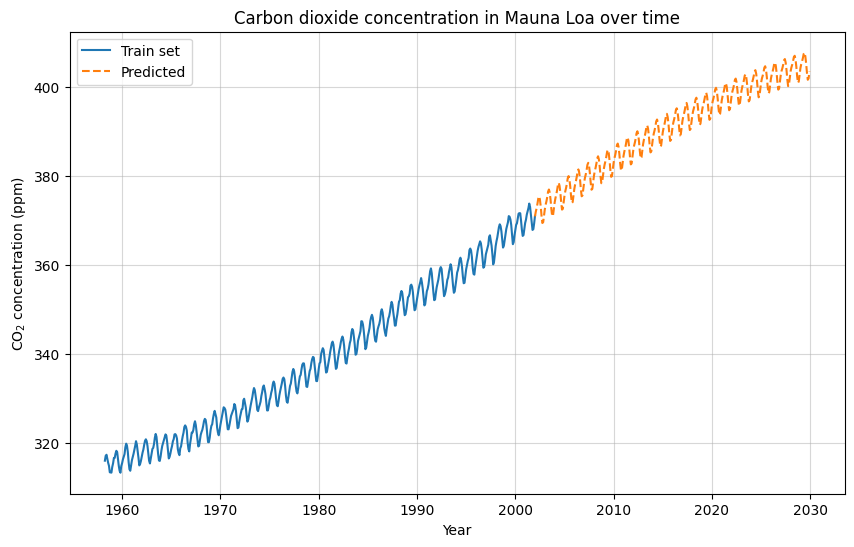

In [8]:
X_train, y_train = mauna_co2.month, mauna_co2.co2
X_test = np.arange(2002, 2030, 1/12).reshape(-1, 1)

X_train = (X_train.dt.year + X_train.dt.month / 12).to_numpy().reshape(-1, 1)

gpr_model = GaussianProcessRegressor(
    kernel=kernel,
    random_state=0).fit(X_train, y_train)

y_pred, std_y_pred = gpr_model.predict(X_test, return_std=True)

plt.figure(figsize=(10, 6))

plt.title("Carbon dioxide concentration in Mauna Loa over time")

plt.plot(X_train, y_train, label='Train set')
plt.plot(X_test, y_pred, label='Predicted', linestyle='dashed')

plt.legend()

plt.xlabel("Year")
plt.ylabel("CO$_2$ concentration (ppm)")

plt.grid(alpha=.5)

plt.show()

The model predicts an increasing in the CO$_2$ concentration over time (reasonable enough), with a slight decreasing in the curve.

### Exercise 4 (practicum: `sklearn`, Gaussian Process classification fitting; potentially requiring theory *to-be-covered*)

Consider an instance of the *Circles* dataset, yet another *toy* dataset for classification featuring two concentric elliptical annuli. For the sake of simplicity, it has been already be generated and plotted for you:

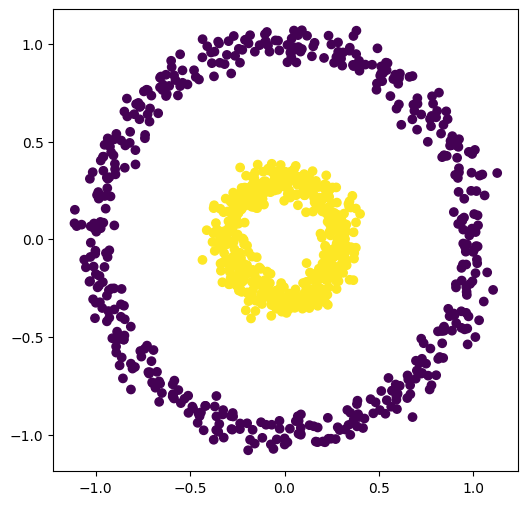

In [9]:
import numpy as np
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (6,6)

x, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
_ = plt.scatter(x[:, 0], x[:, 1], c=y)

`sklearn`'s `GaussianProcessClassifier` approximates the non-Gaussian posterior by a Gaussian approximated through Laplace's saddle-point approximation.

Define an RBF kernel (*hint*: there's a `sklearn.gaussian_process.kernels.RBF` function just for that!) with lenghtscale parameter $l = 1$ and fit a Gaussian Process classifier to the observed data $(x,y)$ from *Circles* right above.

In [10]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=1)

gpc_model = GaussianProcessClassifier(
    kernel=kernel,
    random_state=0).fit(x, y)

The functions that follow, evaluate and plot the posterior predictive mean function over a finite grid of points. Most importantly, the `plot_sklearn_predictions` function requires as arguments the learned GP classifier `sklearn_gp_classifier`, the observed points `x` and their labels `y`.

In [11]:
def meshgrid(x, n, eps=0.1):
    x0, x1 = np.meshgrid(
        np.linspace(x[:, 0].min() - eps, x[:, 0].max() + eps, n),
        np.linspace(x[:, 1].min() - eps, x[:, 1].max() + eps, n),
    )
    x_grid = np.stack([x0.ravel(), x1.ravel()], axis=-1)
    return x0, x1, x_grid


def plot_sklearn_predictions(sklearn_gp_classifier, x, y):
    x0, x1, x_grid = meshgrid(x, 30)

    preds = sklearn_gp_classifier.predict_proba(x_grid)

    _ = plt.figure(figsize=(10, 6))
    _ = plt.contourf(x0, x1, preds[:, 0].reshape(x0.shape), 101, vmin=0, vmax=1)
    _ = plt.contourf(x0, x1, preds[:, 1].reshape(x0.shape), 101, vmin=0, vmax=1)

    _ = plt.title("Posterior Mean")
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.colorbar()
    _ = plt.scatter(x[:, 0], x[:, 1], c=y)

Plot the posterior predictive mean function and the training data, and comment.

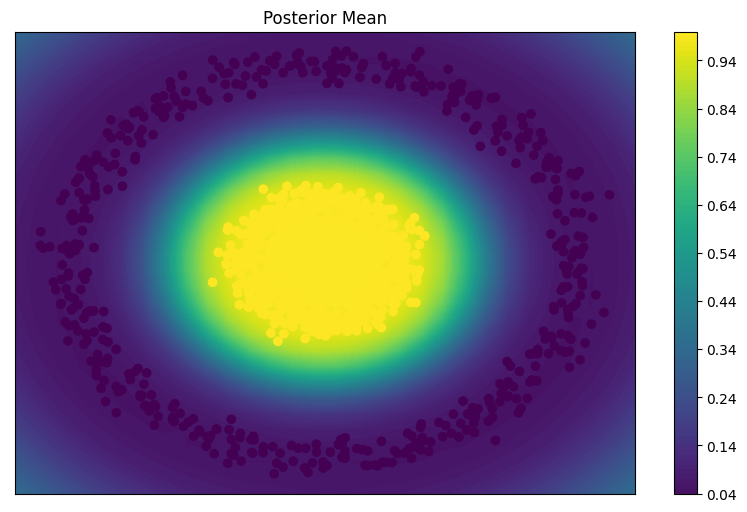

In [12]:
plot_sklearn_predictions(gpc_model, x, y)

The model predicts the classes in a good way.

### Not-an-exercise 5 (*Kernels? Why bother?*)

The following *task* is completely optional and up to your personal curiosity (and also a result of *my own* curiosity 🙃). It will be in no way considered for evaluation-related purposes: it may lead to interesting discussions though (or exam projects? and beyond? who knows!).

If you have never had the occasion to, watch this [brief talk by Ali Rahimi](https://www.youtube.com/watch?v=ORHFOnaEzPc), given in occasion of the 2018 *NeurIPS Test of Time award* (awarded his co-authored 2007 paper with Ben Recht ["Random Features for Large-Scale Kernel Machines"](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf)).

If you have some comments about it, feel free to write or voice them!